In [1]:
import pandas as pd
import os
import ModelEvaluation
from confidence_intervals import evaluate_with_conf_int
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [3]:
#Load in the dataframe containing all model predictions on the FEMH test set
femh_prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/FEMH_ModelPredictions.csv', index_col=0)
print(femh_prediction_df.shape)
femh_prediction_df.head()

(660, 74)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Age_Sex_Symptoms prediction,LR_FeatureStates_Age_Sex_Symptoms probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_FeatureStates_Symptoms prediction,LR_FeatureStates_Symptoms probability,...,SVM_MFCC_Symptoms prediction,SVM_MFCC_Symptoms probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Age_Sex_Symptoms prediction,SVM_OpenSmile_Age_Sex_Symptoms probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability,SVM_OpenSmile_Symptoms prediction,SVM_OpenSmile_Symptoms probability
0,Atrophy-0001apo,Benign,Benign,0.001301,Benign,0.157229,Benign,0.000026,Benign,0.221742,...,Benign,0.008403,Benign,0.010395,Benign,0.017766,Benign,0.019887,Benign,0.025877
1,Atrophy-0400og6,Benign,Benign,0.002063,Benign,0.213735,Benign,0.000276,Benign,0.451704,...,Malignant,0.055249,Benign,0.008386,Benign,0.015901,Benign,0.014908,Benign,0.026531
2,Atrophy-0500cg6,Benign,Benign,0.070688,Malignant,0.711418,Benign,0.044419,Malignant,0.573204,...,Malignant,0.131172,Malignant,0.123806,Malignant,0.083921,Malignant,0.047273,Malignant,0.079512
3,Atrophy-0601ntf,Benign,Malignant,0.961759,Malignant,0.625363,Malignant,0.926107,Malignant,0.625380,...,Benign,0.022580,Benign,0.035384,Benign,0.018849,Benign,0.024361,Benign,0.039769
4,Atrophy-07017ip,Benign,Benign,0.000648,Benign,0.124255,Benign,0.000029,Benign,0.321406,...,Benign,0.014545,Benign,0.011126,Malignant,0.042882,Benign,0.025011,Malignant,0.060018


In [4]:
#Load in the dataframe containing all model predictions on the FEMH test set
svd_prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/SVD_ModelPredictions.csv', index_col=0)
print(svd_prediction_df.shape)
svd_prediction_df.head()

(1333, 38)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_MFCC_Age_Sex prediction,LR_MFCC_Age_Sex probability,LR_MFCC_Rec_Only prediction,LR_MFCC_Rec_Only probability,...,SVM_FeatureStates_Rec_Only prediction,SVM_FeatureStates_Rec_Only probability,SVM_MFCC_Age_Sex prediction,SVM_MFCC_Age_Sex probability,SVM_MFCC_Rec_Only prediction,SVM_MFCC_Rec_Only probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability
0,1862-a_n,Benign,Benign,0.000022,Benign,0.003239,Benign,0.104404,Malignant,0.961383,...,Benign,0.013924,Benign,0.010579,Benign,0.033143,Benign,0.006626,Benign,0.025803
1,1645-a_n,Benign,Benign,0.001011,Benign,0.105273,Benign,0.090834,Benign,0.076010,...,Benign,0.014101,Benign,0.007667,Benign,0.011178,Benign,0.008834,Benign,0.024732
2,127-a_n,Benign,Benign,0.058224,Malignant,0.569727,Benign,0.196545,Benign,0.062510,...,Benign,0.018371,Benign,0.011847,Benign,0.007701,Benign,0.014359,Benign,0.020100
3,567-a_n,Benign,Malignant,0.998790,Malignant,0.960259,Benign,0.100787,Benign,0.000006,...,Malignant,0.028431,Benign,0.008248,Benign,0.025005,Benign,0.011961,Benign,0.016710
4,148-a_n,Benign,Malignant,0.936877,Malignant,0.969719,Benign,0.445125,Malignant,0.908002,...,Malignant,0.038451,Malignant,0.039404,Benign,0.011874,Benign,0.015009,Benign,0.017445


In [5]:
algorithms = ['SVM', 'MLP', 'LR']
input_features = ['Rec_Only', 'Age_Sex']
audio_features = ['FeatureStates', 'OpenSmile', 'MFCC']

In [6]:
alpha = 5 
num_bootstraps = int(50/alpha*100)

In [7]:
FEMH_results=pd.DataFrame(columns=audio_features)
SVD_results=pd.DataFrame(columns=audio_features)

In [8]:
FEMH_results

,FeatureStates,OpenSmile,MFCC


In [9]:
input_feature_map={'Rec_Only':'Voice',
                  'Age_Sex':'Voice + Demographics'}

for algorithm in algorithms:
    for input_feature in input_features:
        index_value = len(FEMH_results)
        FEMH_results.at[index_value, 'Input']=input_feature_map[input_feature]
        FEMH_results.at[index_value, 'Dataset']='FEMH'
        
        SVD_results.at[index_value, 'Input']=input_feature_map[input_feature]
        SVD_results.at[index_value, 'Dataset']='SVD'
        
        for audio_feature in audio_features:
            model = f'{algorithm}_{audio_feature}_{input_feature}'           
            
            FEMH_results.at[index_value, audio_feature] = evaluate_with_conf_int(femh_prediction_df[f'{model} prediction'], balanced_accuracy_score, femh_prediction_df['ground truth'], num_bootstraps=num_bootstraps, alpha=alpha)
            SVD_results.at[index_value, audio_feature] = evaluate_with_conf_int(svd_prediction_df[f'{model} prediction'], balanced_accuracy_score, svd_prediction_df['ground truth'], num_bootstraps=num_bootstraps, alpha=alpha)
            
    
    break

In [10]:
results = pd.concat([FEMH_results, SVD_results])
results=results.set_index(['Dataset', 'Input'])

In [11]:
results

FeatureStates  \
Dataset Input                                                                     
FEMH    Voice                 (0.6911811023622048, (0.5925245692982548, 0.78...   
        Voice + Demographics  (0.6995275590551181, (0.5937254671605484, 0.78...   
SVD     Voice                 (0.6279109937004674, (0.5570120764820229, 0.69...   
        Voice + Demographics  (0.6087177402966877, (0.5293133242988589, 0.69...   

                                                                      OpenSmile  \
Dataset Input                                                                     
FEMH    Voice                 (0.6798425196850394, (0.57970973127654, 0.7718...   
        Voice + Demographics  (0.7516535433070866, (0.6570206263623407, 0.83...   
SVD     Voice                 (0.5816602316602317, (0.4966505602522195, 0.66...   
        Voice + Demographics  (0.6457833773623247, (0.5661434994367922, 0.72...   

                                                                           MFCC  
Dataset Input                                                                    
FEMH    Voice                 (0.6307086614173228, (0.5312485872513563, 0.73...  
        Voice + Demographics  (0.7007874015748031, (0.5991873408111286, 0.80...  
SVD     Voice                 (0.5319955293639504, (0.46187967852182993, 0.6...  
        Voice + Demographics  (0.6813960577118472, (0.5988021494009865, 0.75...

In [12]:
datasets = list(results.index.get_level_values(0).unique())

input_values = list(results.index.get_level_values(1).unique())

features = list(results.columns)

print(datasets)
print(input_values)
print(features)

['FEMH', 'SVD']
['Voice', 'Voice + Demographics']
['FeatureStates', 'OpenSmile', 'MFCC']


In [13]:
num_datasets = len(datasets)
small_gap = num_datasets/4
small_step_length = num_datasets+2*small_gap

big_gap = num_datasets/3

In [14]:
cmap = mpl.colormaps['tab10']
colours = cmap(np.linspace(0, 1, 10))

In [17]:
def get_x(start, step, count):
    return [start + step * i for i in range(count)]

In [18]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

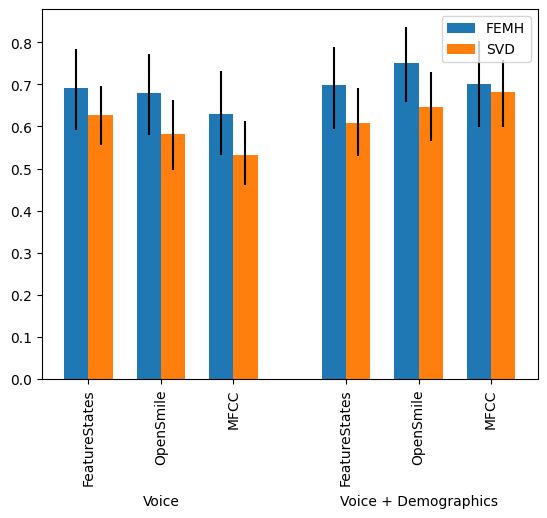

In [19]:
x_start=0
dataset_num=0
x_tick_list=[]

fig, ax = plt.subplots()

for input_value in input_values:
    index_start=x_start
    dataset_xticks = []
    for dataset in datasets:
        dataset_num = datasets.index(dataset)
        values = list(results.loc[dataset, input_value])
        mean_val = [x[0] for x in values]
        lower_ci = [x[1][0] for x in values]
        upper_ci = [x[1][1] for x in values]

        x = get_x(x_start, small_step_length, len(values))

        plt.bar(x, mean_val, width=1, color=colours[dataset_num], label=dataset)
        plt.vlines(x=x, ymin=lower_ci, ymax=upper_ci, colors='k')
        
        x_start+=1
        if len(dataset_xticks)==0:
            dataset_xticks=x
        else:
            dataset_xticks = [(x+y)/2 for x,y in zip(*[dataset_xticks, x])]

    x_tick_list+=dataset_xticks

    
    x_start=x[-1]+big_gap+small_step_length
    label_x = (index_start+x[-1])/2
    plt.text(label_x, -0.3, input_value, ha='center')
    
legend_without_duplicate_labels(ax)

plt.xticks(x_tick_list, features*len(input_values), rotation=90)

plt.show()